# IBM Data Science Cert Course 5 Final Project: Stock Analysis

In [1]:
import yfinance as yf
import pandas as pd

import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt

## Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [4]:
tesla = yf.Ticker("TSLA")

In [6]:
tesla_prices = tesla.history(period="max")

In [7]:
tesla_prices.reset_index(inplace=True)

tesla_prices.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [11]:
url_tesla = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [13]:
data_tesla  = requests.get(url_tesla).text
#print(data_tesla)

In [14]:
soup = BeautifulSoup(data_tesla, 'html.parser')

In [17]:
tesla_dataframe = pd.DataFrame(columns=["Date", "Revenue"])

In [19]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Finally we append the data of each row to the table
    tesla_dataframe = pd.concat([tesla_dataframe,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)    

In [21]:
tesla_dataframe.tail()

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


## Question 3: Extracting GameStop Stock Using yfinance - 2 points

In [24]:
gme = yf.Ticker("GME")

In [26]:
gme_prices = gme.history(period="max")

In [27]:
gme_prices.reset_index(inplace=True)

gme_prices.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [31]:
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [33]:
data_gme  = requests.get(url_gme).text
#print(data_gme)

In [34]:
soup = BeautifulSoup(data_gme, 'html.parser')

In [37]:
gme_dataframe = pd.DataFrame(columns=["Date", "Revenue"])

In [39]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Finally we append the data of each row to the table
    gme_dataframe = pd.concat([gme_dataframe,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)   

In [41]:
gme_dataframe.tail()

,Date,Revenue
11,2009,"$8,806"
12,2008,"$7,094"
13,2007,"$5,319"
14,2006,"$3,092"
15,2005,"$1,843"


## Question 5: Tesla Stock and Revenue Dashboard - 2 Points

In [44]:
# Need to clean the webscraped data in order to plot it

# Remove $ and , characters, then convert to numeric
tesla_dataframe["Revenue"] = tesla_dataframe["Revenue"].str.replace("[$,]", "", regex=True).astype(float)

# Handle invalid Revenue entries if needed
tesla_dataframe["Revenue"] = pd.to_numeric(tesla_dataframe["Revenue"], errors="coerce")
tesla_dataframe = tesla_dataframe.dropna(subset=["Revenue"])

# Convert Date to datetime
tesla_dataframe["Date"] = pd.to_datetime(tesla_dataframe["Date"])

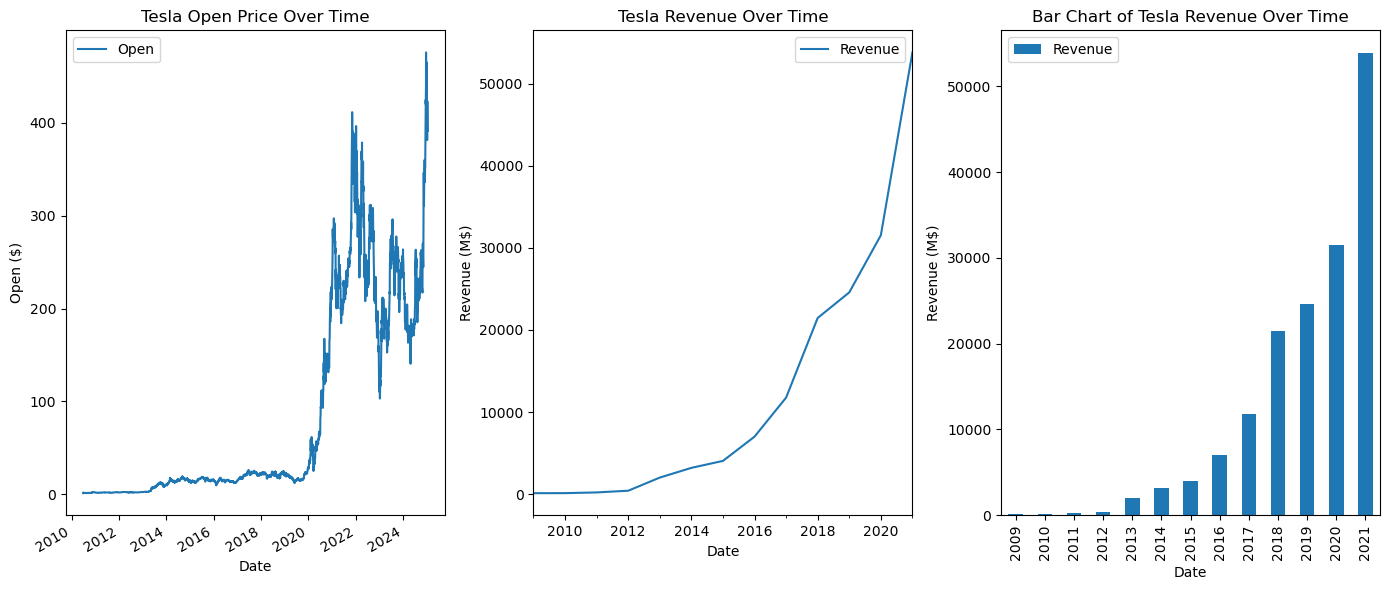

In [57]:
# Create a Matplotlib figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 3, figsize=(14, 6))  # 1 row, 2 columns

# First plot: Revenue over time
tesla_prices.plot(x="Date", y="Open", ax=axes[0], title="Tesla Open Price Over Time")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Open ($)")

# Second plot: Add another example plot (e.g., revenue trend as a bar chart)
tesla_dataframe.plot(x="Date", y="Revenue", ax=axes[1], title="Tesla Revenue Over Time")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Revenue (M$)")

# Extract the year from the Date column
tesla_dataframe["Year"] = tesla_dataframe["Date"].dt.year
# Sorts the dates in ascending order
tesla_dataframe = tesla_dataframe.sort_values("Date")
# Third plot: A bar chart for the revenue
tesla_dataframe.plot(x="Year", y="Revenue", kind="bar", ax=axes[2], title="Bar Chart of Tesla Revenue Over Time")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Revenue (M$)")

# Adjust layout
plt.tight_layout()
plt.show()

## Question 6: GameStop Stock and Revenue Dashboard- 2 Points

In [49]:
# Need to clean the webscraped data in order to plot it

# Remove $ and , characters, then convert to numeric
gme_dataframe["Revenue"] = gme_dataframe["Revenue"].str.replace("[$,]", "", regex=True).astype(float)

# Handle invalid Revenue entries if needed
gme_dataframe["Revenue"] = pd.to_numeric(gme_dataframe["Revenue"], errors="coerce")
gme_dataframe = gme_dataframe.dropna(subset=["Revenue"])

# Convert Date to datetime
gme_dataframe["Date"] = pd.to_datetime(gme_dataframe["Date"])

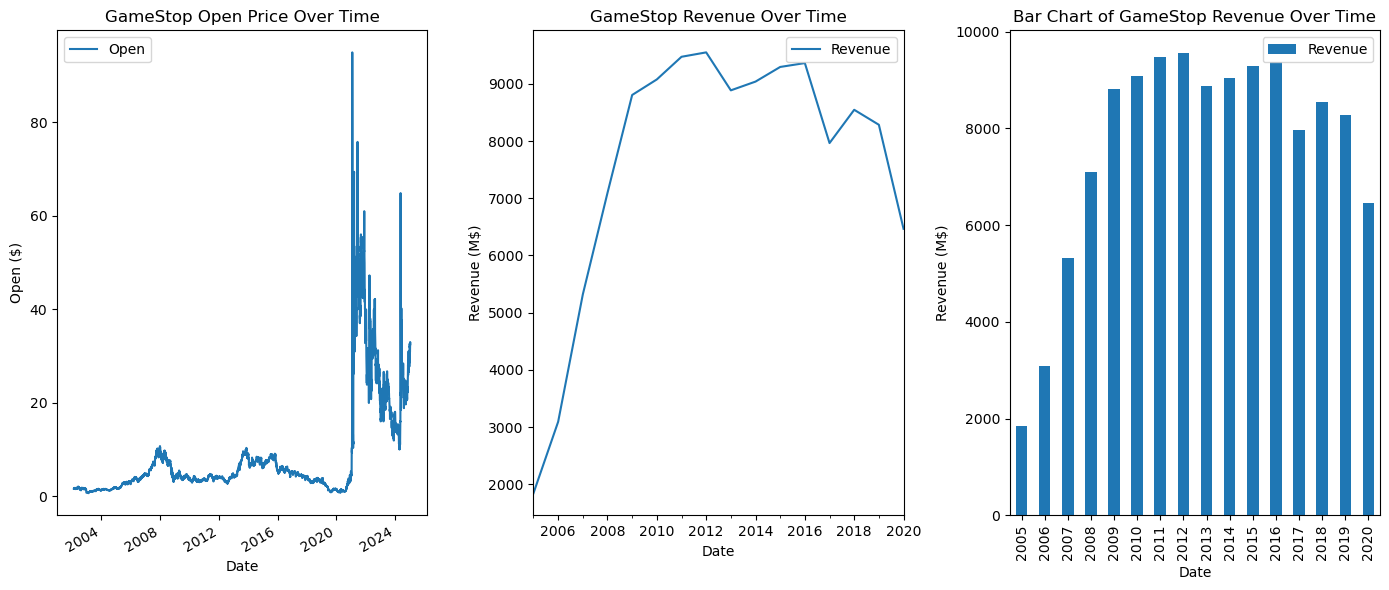

In [53]:
# Create a Matplotlib figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 3, figsize=(14, 6))  # 1 row, 2 columns

# First plot: Revenue over time
gme_prices.plot(x="Date", y="Open", ax=axes[0], title="GameStop Open Price Over Time")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Open ($)")

# Second plot: Add another example plot (e.g., revenue trend as a bar chart)
gme_dataframe.plot(x="Date", y="Revenue", ax=axes[1], title="GameStop Revenue Over Time")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Revenue (M$)")

# Extract the year from the Date column
gme_dataframe["Year"] = gme_dataframe["Date"].dt.year
# Sorts the dates in ascending order
gme_dataframe = gme_dataframe.sort_values("Date")
# Third plot: A bar chart for the revenue
gme_dataframe.plot(x="Year", y="Revenue", kind="bar", ax=axes[2], title="Bar Chart of GameStop Revenue Over Time")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Revenue (M$)")

# Adjust layout
plt.tight_layout()
plt.show()